In [ ]:
!pip install pydub
from scipy.io import wavfile
from pydub import AudioSegment

stereo_audio = AudioSegment.from_file("/content/sample_data/sample.wav", format="wav")

mono_audios = stereo_audio.split_to_mono()
mono_left = mono_audios[0].export("/content/sample_data/sample1.wav", format="wav")
mono_right = mono_audios[1].export("/content/sample_data/sample2.wav", format="wav")


In [ ]:
sample_rate, sample = wavfile.read('/content/sample_data/sample1.wav')

In [ ]:
sample.shape

(472800,)

In [ ]:
sample

array([ -764, -1101, -1177, ...,  2212,  2520,  2209], dtype=int16)

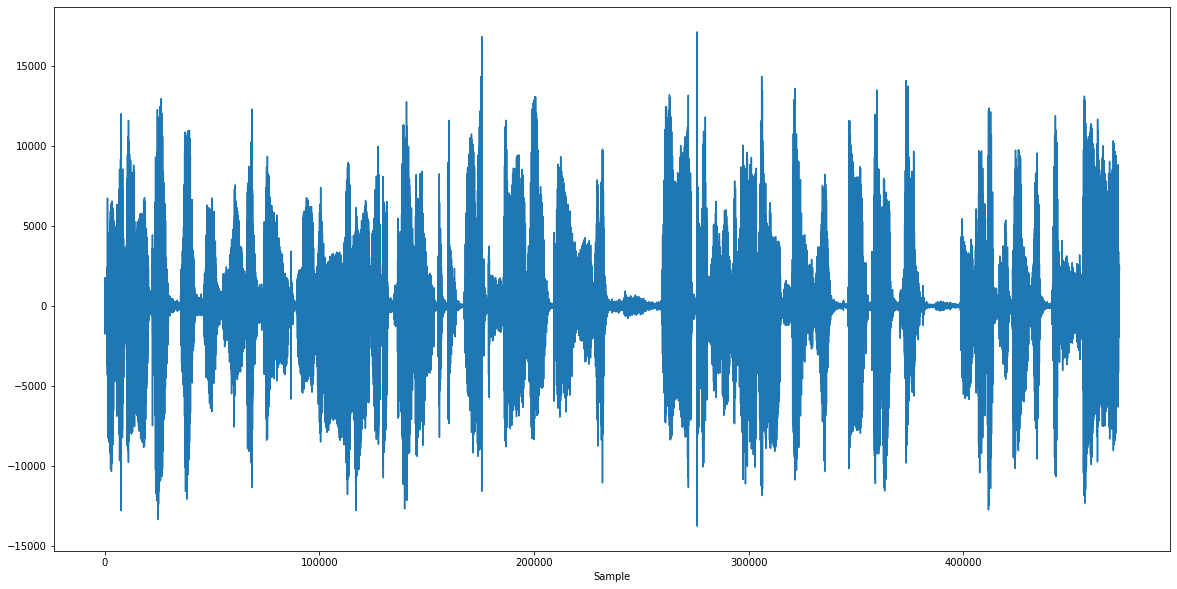

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(sample)
plt.xlabel('Sample')
plt.show()

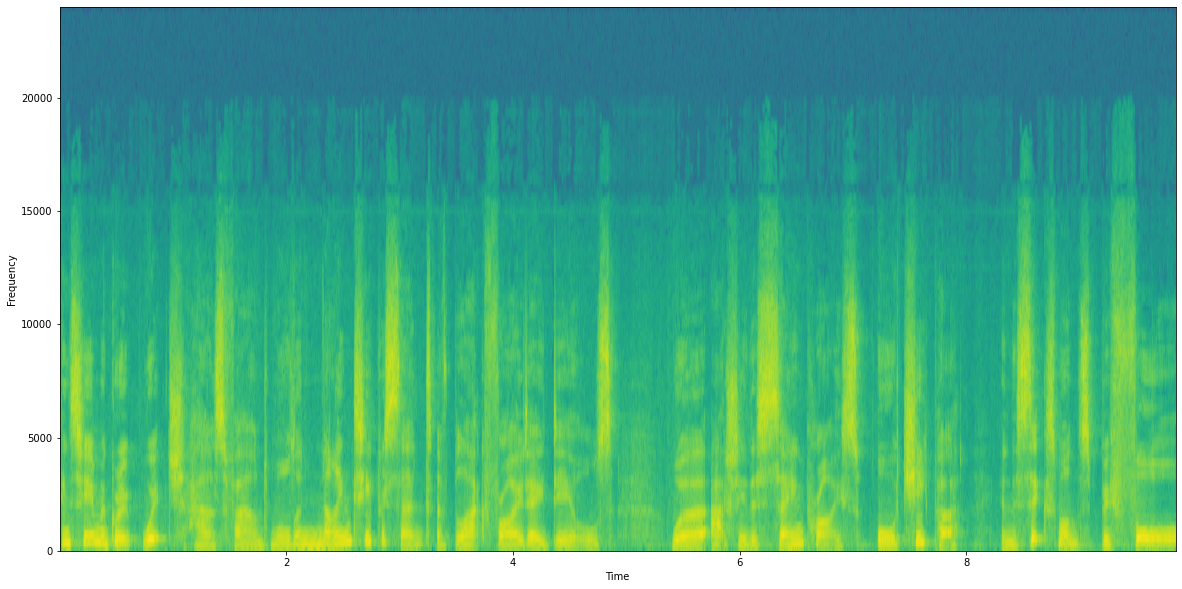

In [ ]:
# Plot the spectrogram
samplingFrequency = sample_rate

plt.figure(figsize=(20,10))
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sample, Fs=samplingFrequency)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()   

In [ ]:
frame_size = int(0.025 * sample_rate)

In [ ]:
frame_size

1200

In [ ]:
frames = []

for i in range(0, len(sample), frame_size):
		frames.append(sample[i:i+frame_size])

In [ ]:
import numpy as np
frames = np.array(frames)
frames_flatten = frames.flatten()

In [ ]:
for frame in frames:
  plt.figure(figsize=(20,10))
  plt.plot(frames_flatten)
  plt.xlabel('Frame')
  plt.show()

In [ ]:

plt.figure(figsize=(20,10))
plt.plot(frames_flatten)
plt.xlabel('Frame')
plt.show()

#Overlapping

In [ ]:
frames.shape

(394, 1200)

In [ ]:
frames_flatten.shape

(472800,)

In [ ]:
 sample.shape

(472800,)

In [ ]:
frame_len = frames.shape[0]
overlapping_start = 1000
data_length = sample.shape[0]
overlapped_frames = []

for i in range(data_length):
  overlapped_frames.append(sample[i:i+frame_len])
  i = i-overlapping_start + frame_len

In [ ]:
overlapped_frames = np.array(overlapped_frames)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
balanced_array = np.zeros([len(overlapped_frames),len(max(overlapped_frames,key = lambda x: len(x)))])
for i,j in enumerate(overlapped_frames):
    balanced_array[i][0:len(j)] = j

In [ ]:
balanced_array.shape

(472800, 394)

In [ ]:
for overlapped in balanced_array:
  plt.figure(figsize=(10,5))
  plt.plot(overlapped)
  plt.xlabel('Overlapped Frame')
  plt.show()